# MTA Turnstile Exploratory Data Anlaysis

## Preparing the Data

### Loading key packages.

In [1]:
import pickle

import pandas as pd
import numpy as np
from scipy.stats import zscore

import datetime
import dateutil.parser

import matplotlib.pyplot as plt
import seaborn as sns

### Parsing the data file and converting saving it as a dataframe.

In [2]:
# Parsing the data file and converting saving it as a dataframe #
df = pd.read_csv(r"C:\Users\Joshua\Metis\Project 1\mar_jun_compiled.csv")

### Checking and cleaning  of the data and adding new columns to the data.

In [3]:
# Removing whitespace from column names #
df.columns = df.columns.str.strip()

In [4]:
# Reformat date into UNIX time #
df['DATE'] = [dateutil.parser.parse(date) for date in df['DATE']]

In [5]:
# Creating a column for the day of the week. 
df['DAY_OF_WEEK'] = [datetime.datetime.weekday(date) for date in df['DATE']]

### Manipulation of the data.
Grouping our data accordingly. 

Removed negative data and unusually large daily counts are they are likely to be anomalous. 

In [6]:
# Grouping our data to obtain a the lowest entries count for the day #
# The difference between today's and the previous's day's minimum entries is our entries counts for the day #
df_daily = df.groupby(['C/A','UNIT','SCP','STATION','DATE','DAY_OF_WEEK']).ENTRIES.agg({'MIN_ENTRIES':'min'})

# Resetting the index #
df_daily.reset_index()

c:\users\joshua\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,C/A,UNIT,SCP,STATION,DATE,DAY_OF_WEEK,MIN_ENTRIES
0,A002,R051,02-00-00,59 ST,2019-02-23,5,6955483
1,A002,R051,02-00-00,59 ST,2019-02-24,6,6956177
2,A002,R051,02-00-00,59 ST,2019-02-25,0,6956582
3,A002,R051,02-00-00,59 ST,2019-02-26,1,6957937
4,A002,R051,02-00-00,59 ST,2019-02-27,2,6959345
5,A002,R051,02-00-00,59 ST,2019-02-28,3,6960690
6,A002,R051,02-00-00,59 ST,2019-03-01,4,6962094
7,A002,R051,02-00-00,59 ST,2019-03-02,5,6963622
8,A002,R051,02-00-00,59 ST,2019-03-03,6,6964363
9,A002,R051,02-00-00,59 ST,2019-03-04,0,6964904


In [7]:
# Grouping our data and returning the difference between the entries in a day and the previous day's #
df_daily['DAILY_ENTRIES'] = df_daily.groupby(['C/A','UNIT','SCP','STATION']).MIN_ENTRIES.diff().shift(-1)

In [8]:
# Resetting the index #
df_daily.reset_index()

,C/A,UNIT,SCP,STATION,DATE,DAY_OF_WEEK,MIN_ENTRIES,DAILY_ENTRIES
0,A002,R051,02-00-00,59 ST,2019-02-23,5,6955483,694.0
1,A002,R051,02-00-00,59 ST,2019-02-24,6,6956177,405.0
2,A002,R051,02-00-00,59 ST,2019-02-25,0,6956582,1355.0
3,A002,R051,02-00-00,59 ST,2019-02-26,1,6957937,1408.0
4,A002,R051,02-00-00,59 ST,2019-02-27,2,6959345,1345.0
5,A002,R051,02-00-00,59 ST,2019-02-28,3,6960690,1404.0
6,A002,R051,02-00-00,59 ST,2019-03-01,4,6962094,1528.0
7,A002,R051,02-00-00,59 ST,2019-03-02,5,6963622,741.0
8,A002,R051,02-00-00,59 ST,2019-03-03,6,6964363,541.0
9,A002,R051,02-00-00,59 ST,2019-03-04,0,6964904,1239.0


In [9]:
# Removing the minimum entries column as we no longer need it. #
df_daily.drop(["MIN_ENTRIES"], axis=1)

DAILY_ENTRIES
C/A   UNIT SCP      STATION       DATE       DAY_OF_WEEK               
A002  R051 02-00-00 59 ST         2019-02-23 5                    694.0
                                  2019-02-24 6                    405.0
                                  2019-02-25 0                   1355.0
                                  2019-02-26 1                   1408.0
                                  2019-02-27 2                   1345.0
                                  2019-02-28 3                   1404.0
                                  2019-03-01 4                   1528.0
                                  2019-03-02 5                    741.0
                                  2019-03-03 6                    541.0
                                  2019-03-04 0                   1239.0
                                  2019-03-05 1                   1481.0
                                  2019-03-06 2                   1455.0
                                  2019-03-07 3                   1437.0
                                  2019-03-08 4                   1484.0
                                  2019-03-09 5                    693.0
                                  2019-03-10 6                    485.0
                                  2019-03-11 0                   1375.0
                                  2019-03-12 1                   1555.0
                                  2019-03-13 2                   1447.0
                                  2019-03-14 3                   1600.0
                                  2019-03-15 4                   1549.0
                                  2019-03-16 5                    860.0
                                  2019-03-17 6                    570.0
                                  2019-03-18 0                   1512.0
                                  2019-03-19 1                   1513.0
                                  2019-03-20 2                   1583.0
                                  2019-03-21 3                   1461.0
                                  2019-03-22 4                   1571.0
                                  2019-03-23 5                    960.0
                                  2019-03-24 6                    712.0
...                                                                 ...
TRAM2 R469 00-05-01 RIT-ROOSEVELT 2019-05-29 2                      0.0
                                  2019-05-30 3                      0.0
                                  2019-05-31 4                      0.0
                                  2019-06-01 5                      0.0
                                  2019-06-02 6                      0.0
                                  2019-06-03 0                      0.0
                                  2019-06-04 1                      0.0
                                  2019-06-05 2                      0.0
                                  2019-06-06 3                      0.0
                                  2019-06-08 5                      0.0
                                  2019-06-09 6                      0.0
                                  2019-06-10 0                      0.0
                                  2019-06-11 1                      0.0
                                  2019-06-12 2                      0.0
                                  2019-06-13 3                      0.0
                                  2019-06-14 4                      0.0
                                  2019-06-15 5                      0.0
                                  2019-06-16 6                      0.0
                                  2019-06-17 0                      0.0
                                  2019-06-18 1                      0.0
                                  2019-06-19 2                      0.0
                                  2019-06-20 3                      0.0
                                  2019-06-21 4                      0.0
                          

In [10]:
# Setting negative entries from the dataframe as null as they may be due to the counter reset #
# With each turnstile having a unique reset value, it is hard for us to determine the counts for the day #
# Therefore, it is better to set them as missing rather than negative #
df_daily.loc[df_daily["DAILY_ENTRIES"] < 0, "DAILY_ENTRIES"] = np.nan

In [14]:
# Setting extremely large counts as null #
# Improbable that a single turnstile will have more than a million commuters per day #
# Data is likely to be anomalous #
df_daily.loc[df_daily["DAILY_ENTRIES"] > 1000000, "DAILY_ENTRIES"] = np.nan

### Creating a dataframe with daily average entries for each day of the week for each station.



In [15]:
df_MTA_daily = df_daily.reset_index().drop(['C/A','SCP','UNIT'], axis=1)

# Grouping the dataframe and summing up their daily entries #
df_MTA_daily = df_MTA_daily.groupby(['STATION','DATE','DAY_OF_WEEK'])["DAILY_ENTRIES"].agg({'DAILY_ENTRIES':'sum'})

c:\users\joshua\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


### Creating a dataframe with the mean daily entries per station.

In [16]:
df_MTA_stats = df_MTA_daily.groupby(['STATION'])['DAILY_ENTRIES'] \
                           .agg({'MEAN_DAILY_ENTRIES':'mean'}).reset_index()

c:\users\joshua\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


### Creating a dataframe with the mean and standard deviation of daily entries per station per day.

In [17]:
df_MTA_daily_stats = df_MTA_daily.groupby(['STATION','DAY_OF_WEEK'])['DAILY_ENTRIES'] \
                            .agg({'MEAN_ENTRIES_DAILY':'mean','STDEV_ENTRIES':'std'})
df_MTA_daily_stats.reset_index(inplace=True)

c:\users\joshua\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


### Creating a new dataframe comparing weekday to weekend traffic.

We can analyse how different stations vary in their differences between weekday and weekend travel to postulate which stations are more likely to have locals than tourists.
This would increase the sign up rate for the gala event.

In [18]:
df_wkday_wkend = df_daily.groupby(['STATION','DAY_OF_WEEK'])["DAILY_ENTRIES"].sum().reset_index()

# Transposing the rows for days of the week to a column #
df_wkday_wkend = df_wkday_wkend.pivot(index="STATION", columns="DAY_OF_WEEK")["DAILY_ENTRIES"].reset_index()

# Adding weekday and weekend columns that sum up the counts respectively # 
df_wkday_wkend["WEEKDAYS"] = df_wkday_wkend[0] + df_wkday_wkend[1] + df_wkday_wkend[2] + df_wkday_wkend[3] + df_wkday_wkend[4]
df_wkday_wkend["WEEKENDS"] = df_wkday_wkend[5] + df_wkday_wkend[6]

# Drop old daily columns #
df_wkday_wkend.drop([0,1,2,3,4,5,6], axis=1, inplace=True)

# Creating a column for the difference between weekday and weekend traffic #
df_wkday_wkend["DIFFERENCE"] = df_wkday_wkend.WEEKDAYS - df_wkday_wkend.WEEKENDS

# Creating a column for proportion of weekend travel to weekday #
df_wkday_wkend["WKEND_WKDAY_RATIO"] = df_wkday_wkend.WEEKENDS / df_wkday_wkend.WEEKDAYS
df_wkday_wkend['WKEND_WKDAY_RATIO'] = df_wkday_wkend['WKEND_WKDAY_RATIO'].astype(float).map("{:.2%}".format) 

In [19]:
# Dataframe with difference between Weekdays and Weekends #
df_wkday_wkend_diff = df_wkday_wkend.groupby('STATION').agg({'DIFFERENCE':'sum'}).reset_index()

# Top 7 Stations with the greatest difference between weekday and weekend traffic #
wkday_wkend_top7_diff = df_wkday_wkend_diff.sort_values(by='DIFFERENCE', ascending=False).iloc[:7]

### Sorting our dataframe to display only the top 7 stations based on number of entries. 

In [20]:
# Sorting the stations with the highest mean daily entries appearing first #
df_stations_sorted_mean = df_MTA_stats.sort_values(by="MEAN_DAILY_ENTRIES",ascending=False).reset_index()
df_stations_sorted_mean.drop('index', axis=1, inplace=True)

# Saving the top 7 stations based on mean entries to a dataframe #
df_stations_sorted_top_7 = df_stations_sorted_mean.iloc[:7]

# Saving the top 7 stations based on mean entries to a list #
top7_stations = df_stations_sorted_mean['STATION'].values[:7]

In [21]:
# Drops the rows that correspond to stations that are outside of the top 7 #
df_wkday_wkend = df_wkday_wkend[df_wkday_wkend['STATION'].isin(top7_stations)] 

# Ranking the top 7 stations based on their weekend to weekday ratio #
# Lower ratio being better as it means that there are more locals either working or living those stations #
wkday_wkend_ratio_rank = df_wkday_wkend.sort_values(by='WKEND_WKDAY_RATIO')

In [22]:
# Drops the rows that correspond to stations that are outside of the top 7 #
df_daily_stats_top7 = df_MTA_daily_stats[df_MTA_daily_stats['STATION'].isin(top7_stations)] 

In [23]:
days_list = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

### Plotting of graphs.

<Figure size 432x288 with 0 Axes>

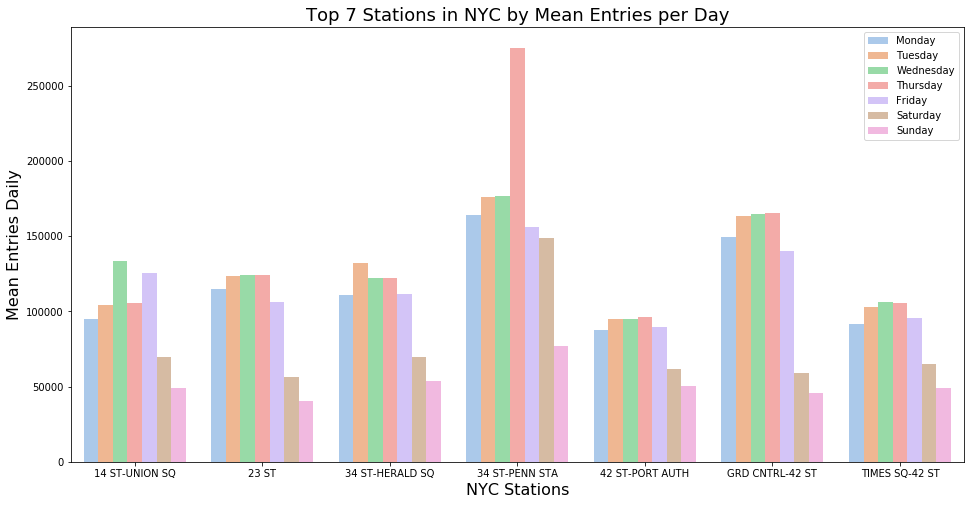

In [35]:
# Bar plot for the top 7 stations by volume per day of the week #
sns.set_palette('pastel')
top7_barplot = plt.figure()
plt.figure(figsize=(16, 8))
plt.title("Top 7 Stations in NYC by Mean Entries per Day", fontsize=18)
top7_barplot = sns.barplot(x='STATION', y='MEAN_ENTRIES_DAILY',hue='DAY_OF_WEEK', 
                hue_order = days_list, data=df_daily_stats_top7 \
                .replace({'DAY_OF_WEEK' : {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3
                                        : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}}))
plt.xlabel("NYC Stations", fontsize=16)
plt.ylabel("Mean Entries Daily", fontsize=16)
legend = top7_barplot.legend()
legend.texts[0].set_text("Monday")
plt.show();

#### Analysis of daily entries.

ST-PENN had the largest 

In [36]:
# Saving the barplot figure #
top7_barplot_figure = top7_barplot.get_figure()
top7_barplot_figure.savefig("top7_barplot.png")

<Figure size 432x288 with 0 Axes>

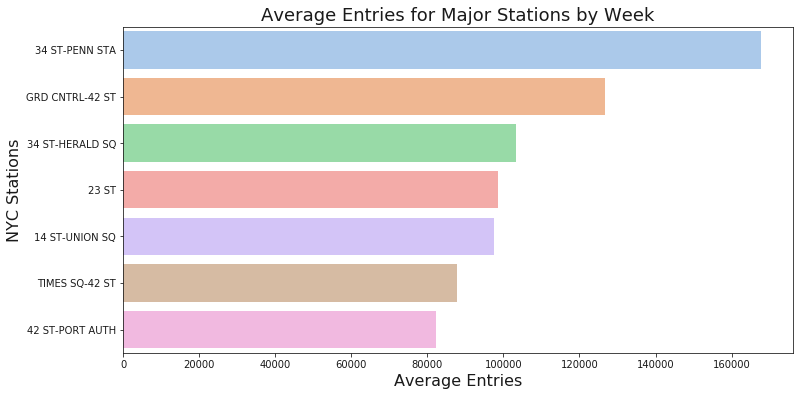

In [37]:
# Horizontal bar plot for the highest volumer per station #
sns.set_color_codes("pastel")
top7_hori_bar_plot = plt.figure()
plt.figure(figsize=(12, 6))
plt.title("Average Entries for Major Stations by Week", fontsize=18)
top7_hori_bar_plot = sns.barplot(x="MEAN_DAILY_ENTRIES", y='STATION',
                                 data=df_stations_sorted_top_7
                                 .replace({'DAY_OF_WEEK' : {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 
                                                         : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}}))
plt.xlabel("Average Entries", fontsize=16)
plt.ylabel("NYC Stations", fontsize=16)
plt.show();

In [38]:
# Saving the horizontal barplot figure #
top7_hori_barplot_fig = top7_hori_bar_plot.get_figure()
top7_hori_barplot_fig.savefig("top7_hori_barplot.png")

### Additional Notes

Methodology:
We analysed four months worth of data of turnstile data from MTA for the period March to June 2019. 
We decided to based our analysis only on the months leading to summer as we belive the time frame provides
enough time for the team to garner sign ups and have enough time to prepare for the gala as well.

As the team will be garnering sign ups over a long period, we believe that providing the average entries 
provides more meaningful insight. 

Also, we assume that people are less likely to stop while exiting and have decided to focus on entries only.

Potential to analyse the seasonality of our top stations.

Data Analysis:
Times Square --> Direct vicinity tourist attraction Times Square and  Broadway theatre. Located in CBD as well. 
High volume of locals but also high volume of tourists. Tourists are dilutive.

